In [1]:
import matplotlib.pyplot as plt

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


### Import Dataset

In [3]:
df = pd.read_csv("/Users/Dataset/telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Feature Engineering

In [5]:
df.drop(['customerID'], axis='columns',inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Conversion appropriate datatype

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df['TotalCharges'].isnull().any()

True

In [10]:
df = df.dropna()

In [11]:
df['TotalCharges'].isnull().any()

False

In [12]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

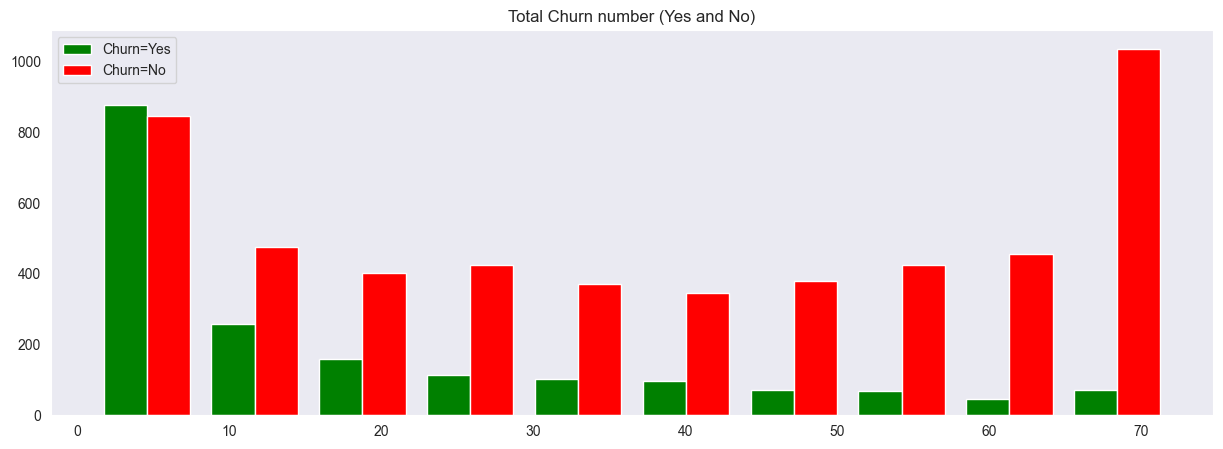

In [13]:
sns.set_style('dark')
plt.figure(figsize=(15,5))
plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title("Total Churn number (Yes and No)")
plt.xlabel("")
plt.show()

### Check unique value of columns

In [14]:
def unique_value(df):
    i=1
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{i}. {column}:-- {df[column].unique()}')
            i+=1

In [15]:
unique_value(df)

1. gender:-- ['Female' 'Male']
2. Partner:-- ['Yes' 'No']
3. Dependents:-- ['No' 'Yes']
4. PhoneService:-- ['No' 'Yes']
5. MultipleLines:-- ['No phone service' 'No' 'Yes']
6. InternetService:-- ['DSL' 'Fiber optic' 'No']
7. OnlineSecurity:-- ['No' 'Yes' 'No internet service']
8. OnlineBackup:-- ['Yes' 'No' 'No internet service']
9. DeviceProtection:-- ['No' 'Yes' 'No internet service']
10. TechSupport:-- ['No' 'Yes' 'No internet service']
11. StreamingTV:-- ['No' 'Yes' 'No internet service']
12. StreamingMovies:-- ['No' 'Yes' 'No internet service']
13. Contract:-- ['Month-to-month' 'One year' 'Two year']
14. PaperlessBilling:-- ['Yes' 'No']
15. PaymentMethod:-- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
16. Churn:-- ['No' 'Yes']


### Data clean with replace
* Replace 'No internet service' with No

In [16]:
df.replace('No internet service','No', inplace=True)
df.replace('No phone service','No', inplace=True)

In [17]:
unique_value(df)

1. gender:-- ['Female' 'Male']
2. Partner:-- ['Yes' 'No']
3. Dependents:-- ['No' 'Yes']
4. PhoneService:-- ['No' 'Yes']
5. MultipleLines:-- ['No' 'Yes']
6. InternetService:-- ['DSL' 'Fiber optic' 'No']
7. OnlineSecurity:-- ['No' 'Yes']
8. OnlineBackup:-- ['Yes' 'No']
9. DeviceProtection:-- ['No' 'Yes']
10. TechSupport:-- ['No' 'Yes']
11. StreamingTV:-- ['No' 'Yes']
12. StreamingMovies:-- ['No' 'Yes']
13. Contract:-- ['Month-to-month' 'One year' 'Two year']
14. PaperlessBilling:-- ['Yes' 'No']
15. PaymentMethod:-- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
16. Churn:-- ['No' 'Yes']


In [18]:
col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
for item in col:
    df[item]=df[item].map({'Yes':1,'No':0})

In [20]:
for column in df:
        print(f' {column}:-- {df[column].unique()}')

 gender:-- ['Female' 'Male']
 SeniorCitizen:-- [0 1]
 Partner:-- [1 0]
 Dependents:-- [0 1]
 tenure:-- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService:-- [0 1]
 MultipleLines:-- [0 1]
 InternetService:-- ['DSL' 'Fiber optic' 'No']
 OnlineSecurity:-- [0 1]
 OnlineBackup:-- [1 0]
 DeviceProtection:-- [0 1]
 TechSupport:-- [0 1]
 StreamingTV:-- [0 1]
 StreamingMovies:-- [0 1]
 Contract:-- ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling:-- [1 0]
 PaymentMethod:-- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges:-- [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges:-- [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn:-- [0 1]


In [21]:
df['gender']=df['gender'].map({'Female':1,'Male':0})

In [22]:
for column in df:
        print(f' {column}:-- {df[column].unique()}')

 gender:-- [1 0]
 SeniorCitizen:-- [0 1]
 Partner:-- [1 0]
 Dependents:-- [0 1]
 tenure:-- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService:-- [0 1]
 MultipleLines:-- [0 1]
 InternetService:-- ['DSL' 'Fiber optic' 'No']
 OnlineSecurity:-- [0 1]
 OnlineBackup:-- [1 0]
 DeviceProtection:-- [0 1]
 TechSupport:-- [0 1]
 StreamingTV:-- [0 1]
 StreamingMovies:-- [0 1]
 Contract:-- ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling:-- [1 0]
 PaymentMethod:-- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges:-- [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges:-- [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn:-- [0 1]


### One hot encoding

In [23]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'],dtype='int')

In [24]:
for column in df:
        print(f' {column}:-- {df[column].unique()}')

 gender:-- [1 0]
 SeniorCitizen:-- [0 1]
 Partner:-- [1 0]
 Dependents:-- [0 1]
 tenure:-- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService:-- [0 1]
 MultipleLines:-- [0 1]
 OnlineSecurity:-- [0 1]
 OnlineBackup:-- [1 0]
 DeviceProtection:-- [0 1]
 TechSupport:-- [0 1]
 StreamingTV:-- [0 1]
 StreamingMovies:-- [0 1]
 PaperlessBilling:-- [1 0]
 MonthlyCharges:-- [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges:-- [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn:-- [0 1]
 InternetService_DSL:-- [1 0]
 InternetService_Fiber optic:-- [0 1]
 InternetService_No:-- [0 1]
 Contract_Month-to-month:-- [1 0]
 Contract_One year:-- [0 1]
 Contract_Two year:-- [0 1]
 PaymentMethod_Bank transfer (automatic):-- [0 1]
 PaymentMethod_Credit card (automatic):-- [0 1]
 PaymentMethod_Electronic check:-- [1

In [25]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Standarization 

In [26]:
encoder = StandardScaler()
df['tenure']=encoder.fit_transform(df[['tenure']])
df['MonthlyCharges']=encoder.fit_transform(df[['MonthlyCharges']])
df['TotalCharges']=encoder.fit_transform(df[['TotalCharges']])

In [27]:
for column in df:
        print(f' {column}:-- {df[column].unique()}')

 gender:-- [1 0]
 SeniorCitizen:-- [0 1]
 Partner:-- [1 0]
 Dependents:-- [0 1]
 tenure:-- [-1.28024804  0.06430269 -1.23950408  0.51248626 -0.99504031 -0.42462485
 -0.91355239 -0.18016108  1.2051336  -0.7913205  -0.66908862  1.04215776
  0.6754621  -0.30239297  1.49034133  0.79769399  1.57182925 -0.46536881
 -0.83206446 -0.09867316  0.59397418  1.61257321 -0.62834466 -0.22090504
 -1.11727219  0.55323022 -0.87280842  1.53108529  1.24587756  0.43099834
 -0.70983258  1.12364568 -0.5876007   1.36810945 -0.95429635 -1.19876011
 -0.0579292   0.71620607  1.28662152  0.96066983 -1.03578427  0.39025438
  0.10504665  0.63471814 -0.13941712  1.32736548  0.22727853  1.44959737
 -0.01718524  0.91992587  0.18653457  0.14579061  0.34951041 -1.07652823
 -1.15801615  0.02355872  1.40885341 -0.38388089  1.00141379  1.16438964
 -0.75057654 -0.50611277  0.83843795  0.30876645  1.08290172 -0.34313693
  0.4717423  -0.54685673  0.87918191  0.75695003 -0.26164901  0.26802249]
 PhoneService:-- [0 1]
 Multiple

In [195]:
plt.figure(figsize=(15,5))
df.corr().round(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.00,0.00,0.00,-0.01,-0.01,0.01,0.01,0.02,0.01,0.00,...,-0.01,0.01,-0.00,0.00,-0.01,0.00,0.02,-0.00,-0.00,-0.01
SeniorCitizen,0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.04,0.07,0.06,...,-0.11,0.25,-0.18,0.14,-0.05,-0.12,-0.02,-0.02,0.17,-0.15
Partner,0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.14,0.14,0.15,...,-0.00,0.00,-0.00,-0.28,0.08,0.25,0.11,0.08,-0.08,-0.10
Dependents,-0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.08,0.02,0.01,...,0.05,-0.16,0.14,-0.23,0.07,0.20,0.05,0.06,-0.15,0.06
tenure,-0.01,0.02,0.38,0.16,1.00,0.01,0.33,0.33,0.36,0.36,...,0.01,0.02,-0.04,-0.65,0.20,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.09,-0.05,-0.07,...,-0.45,0.29,0.17,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00
MultipleLines,0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.20,0.20,...,-0.20,0.37,-0.21,-0.09,-0.00,0.11,0.08,0.06,0.08,-0.23
OnlineSecurity,0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,1.00,0.28,0.27,...,0.32,-0.03,-0.33,-0.25,0.10,0.19,0.09,0.12,-0.11,-0.08
OnlineBackup,0.01,0.07,0.14,0.02,0.36,-0.05,0.20,0.28,1.00,0.30,...,0.16,0.17,-0.38,-0.16,0.08,0.11,0.09,0.09,-0.00,-0.17
DeviceProtection,0.00,0.06,0.15,0.01,0.36,-0.07,0.20,0.27,0.30,1.00,...,0.15,0.18,-0.38,-0.23,0.10,0.17,0.08,0.11,-0.00,-0.19


<Figure size 1500x500 with 0 Axes>

#### Split Input and Target Feature

In [28]:
feature = df.drop('Churn', axis='columns')
target = df['Churn']

#### Split training and testing data

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(feature,target, train_size=0.1, random_state=True)

#### Build Model

In [169]:
model = Sequential()
model.add(Dense(8, input_shape=(26,), activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [170]:
adam=Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics='accuracy')

In [171]:
es = EarlyStopping(monitor='loss', patience=6)

In [172]:
history = model.fit(feature, target, epochs=50, callbacks=[es], validation_split=0.05)

Epoch 1/50
209/209 [==============================] - 5s 23ms/step - loss: 0.5241 - accuracy: 0.7425 - val_loss: 0.4767 - val_accuracy: 0.7670
Epoch 2/50
209/209 [==============================] - 1s 7ms/step - loss: 0.4386 - accuracy: 0.7954 - val_loss: 0.4681 - val_accuracy: 0.7784
Epoch 3/50
209/209 [==============================] - 1s 6ms/step - loss: 0.4282 - accuracy: 0.7990 - val_loss: 0.4657 - val_accuracy: 0.7500
Epoch 4/50
209/209 [==============================] - 1s 7ms/step - loss: 0.4232 - accuracy: 0.7972 - val_loss: 0.4644 - val_accuracy: 0.7812
Epoch 5/50
209/209 [==============================] - 1s 6ms/step - loss: 0.4194 - accuracy: 0.8001 - val_loss: 0.4606 - val_accuracy: 0.7727
Epoch 6/50
209/209 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8043 - val_loss: 0.4596 - val_accuracy: 0.7756
Epoch 7/50
209/209 [==============================] - 1s 6ms/step - loss: 0.4151 - accuracy: 0.8037 - val_loss: 0.4592 - val_accuracy: 0.7812
Epoch

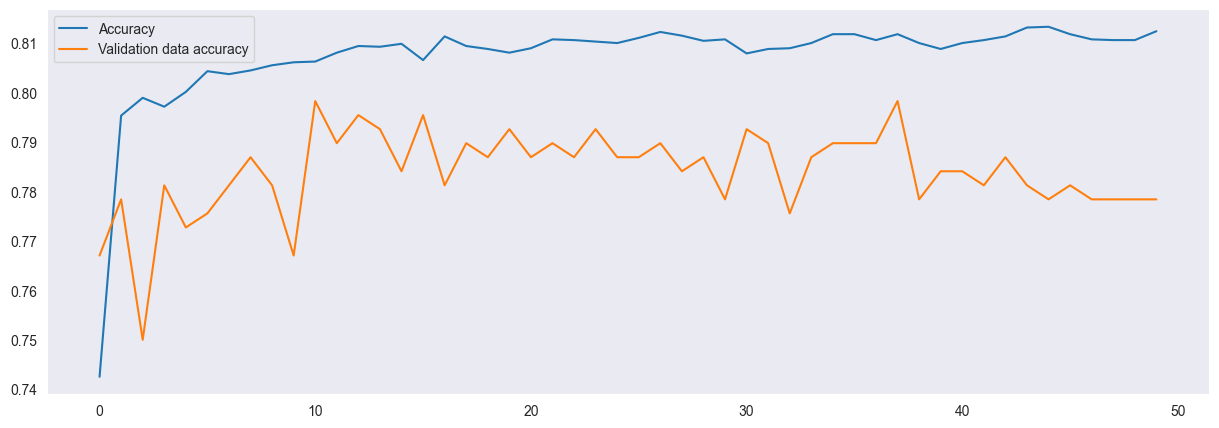

In [175]:
sns.set_style('dark')
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation data accuracy')
plt.legend()
plt.show()

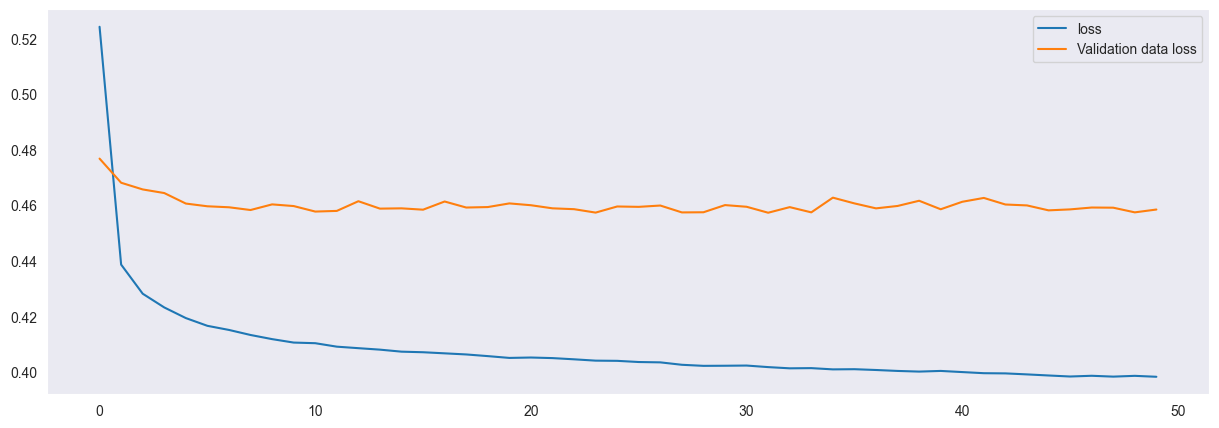

In [176]:
sns.set_style('dark')
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation data loss')
plt.legend()
plt.show()

In [177]:
y_pre=model.predict(xtest)

198/198 [==============================] - 0s 2ms/step


In [178]:
x=xtest[:1]
y=ytest[1]
y_crosscheck = model.predict(x)
print (f'real value of xtest is whose corresponding ytes is {y}')
print(f'After predict ytest value is {y_crosscheck}')

1/1 [==============================] - 0s 88ms/step
real value of xtest is whose corresponding ytes is 0
After predict ytest value is [[0.00571257]]


In [179]:
y_pre[:5]

array([[0.00571257],
       [0.63143206],
       [0.08725096],
       [0.65791744],
       [0.55146563]], dtype=float32)

In [180]:
ytest[:5]

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

In [181]:
yp=[]
for element in y_pre:
    if element>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [182]:
yp[:5]

[0, 1, 0, 1, 1]

In [183]:
from sklearn.metrics import confusion_matrix,classification_report

In [184]:
print(confusion_matrix(ytest,yp))

[[4253  400]
 [ 796  880]]


In [185]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4653
           1       0.69      0.53      0.60      1676

    accuracy                           0.81      6329
   macro avg       0.76      0.72      0.74      6329
weighted avg       0.80      0.81      0.80      6329



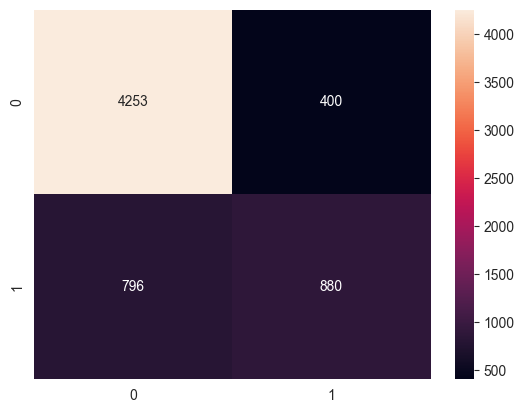

In [186]:
import seaborn as sns
x =confusion_matrix(ytest,yp)
sns.heatmap(x, annot=True,fmt='d')
plt.show();